In [7]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import pickle
from IPython.display import clear_output



dataset = pd.read_csv("../GTZAN/Data/features_30_sec.csv")

df = dataset.copy()

non_floats = []
for col in df.iloc[:,:-1]:
    if df[col].dtypes != "float64":
        non_floats.append(col)
df = df.drop(columns=non_floats)

L = len(df.columns)
X = df.iloc[:,:L-1].values
df.label = pd.Categorical(df.label)
y = np.array(df.label.cat.codes)
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(x_scaled, y,test_size=0.8, random_state=42)
def train(epochs_num):
    model = Sequential()
    model.add(Dense(100, activation='relu', input_shape=(x_scaled.shape[1],)))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(10, activation='softmax'))

    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    model.fit(X_train, y_train, epochs=epochs_num, batch_size=32, verbose=1)
    pred = model.predict(X_test)
    y_pred = pred.argmax(axis=-1)
    clear_output()
    return (accuracy_score(y_pred, y_test))
# train(190)

# with open('nn_model.pkl', 'wb') as file:
#     pickle.dump(model, file)

Text(0, 0.5, 'Error Rate')

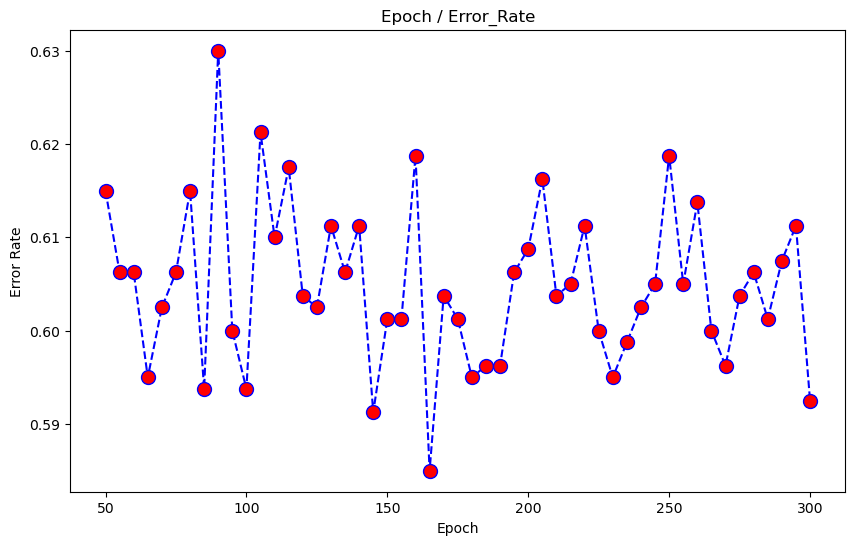

In [9]:
import matplotlib.pyplot as plt
res = []
for epoch in range(50,301,5):
    res.append(train(epoch))
plt.figure(figsize = (10,6))

plt.plot(range(50,301,5), res, color = 'blue', linestyle = '--', markersize = '10', markerfacecolor = 'red', marker = 'o')

plt.title('Epoch / Error_Rate')
plt.xlabel('Epoch')
plt.ylabel('Error Rate')

In [11]:
print(max(res))

0.63


In [3]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# model = Sequential()
# model.add(Dense(64, activation='relu', input_shape=(x_scaled.shape[1],)))
# model.add(Dense(32, activation='relu'))
# model.add(Dense(10, activation='softmax'))

# model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# model.fit(X_train, y_train, epochs=190, batch_size=32, verbose=1)


Epoch 1/190


/home/khangpt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1560 - loss: 2.3808  
Epoch 2/190
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2829 - loss: 2.1444 
Epoch 3/190
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3372 - loss: 1.9897 
Epoch 4/190
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4348 - loss: 1.7958 
Epoch 5/190
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4128 - loss: 1.6974 
Epoch 6/190
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4931 - loss: 1.6073 
Epoch 7/190
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5146 - loss: 1.4825 
Epoch 8/190
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5624 - loss: 1.4070 
Epoch 9/190
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5495 - loss: 1.2951 
Epoch 10/190
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6162 - loss: 1.1662 
Epoch 11/190
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6494 - loss: 1.0957 
Epoch 12/190
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6579 - loss: 1.1171 


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


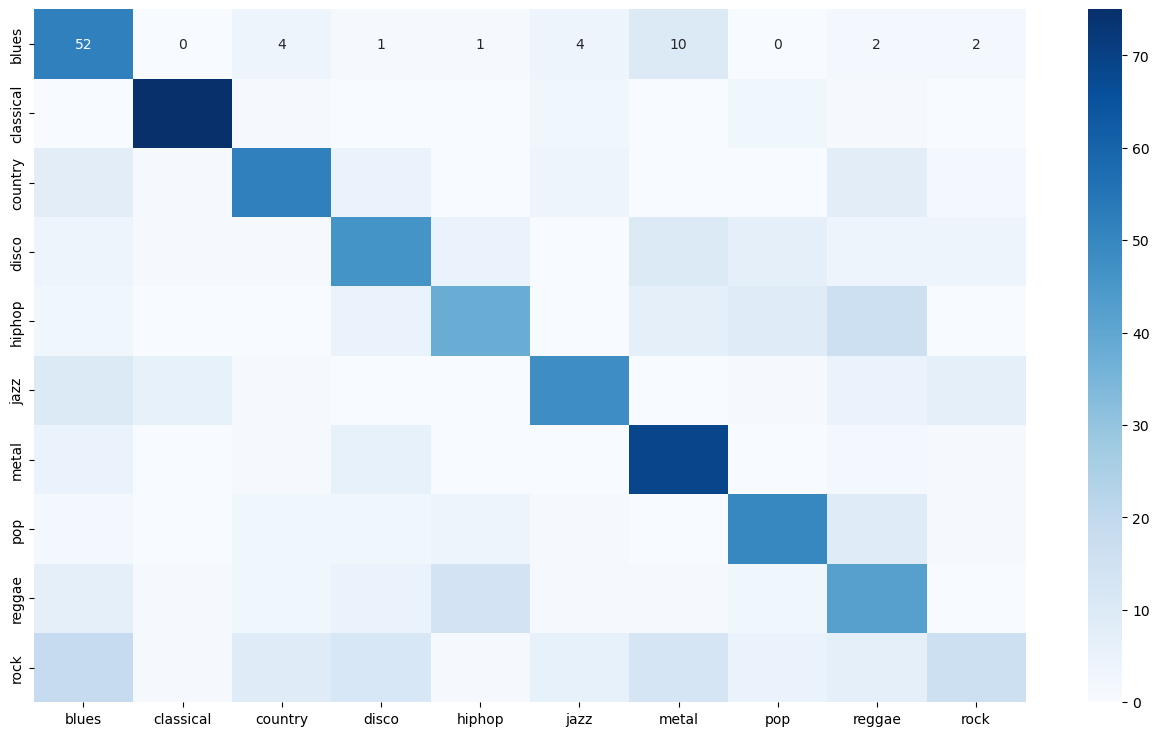

In [4]:
pred = np.argmax(model.predict(X_test),axis=-1)
confusion_matr = confusion_matrix(y_test, pred) #normalize = 'true'
plt.figure(figsize = (16, 9))
sns.heatmap(confusion_matr, cmap="Blues", annot=True, 
            xticklabels = ["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"],
           yticklabels=["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"]);

In [5]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.47      0.68      0.56        76
           1       0.88      0.90      0.89        83
           2       0.69      0.65      0.67        80
           3       0.55      0.56      0.56        82
           4       0.60      0.49      0.54        78
           5       0.72      0.62      0.66        78
           6       0.63      0.82      0.71        84
           7       0.64      0.68      0.66        73
           8       0.44      0.55      0.49        77
           9       0.48      0.18      0.26        89

    accuracy                           0.61       800
   macro avg       0.61      0.61      0.60       800
weighted avg       0.61      0.61      0.60       800

